In [173]:
#Load the packages in the tidyverse into the current R session
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [174]:
data = pd.read_csv("Capstone_data_NCAA_Academic_Progress_data_clean.csv")

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5797 entries, 0 to 5796
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SCHOOL_ID             5797 non-null   int64  
 1   SCHOOL_NAME           5797 non-null   object 
 2   SCHOOL_TYPE           5797 non-null   int64  
 3   ACADEMIC_YEAR         5797 non-null   int64  
 4   SPORT_CODE            5797 non-null   int64  
 5   SPORT_NAME            5797 non-null   object 
 6   NCAA_DIVISION         5797 non-null   int64  
 7   NCAA_CONFERENCE       5797 non-null   object 
 8   FOURYEAR_ATHLETES     5797 non-null   int64  
 9   FOURYEAR_SCORE        5797 non-null   int64  
 10  FOURYEAR_ELIGIBILITY  5797 non-null   float64
 11  FOURYEAR_RETENTION    5797 non-null   float64
 12  2014_ATHLETES         5797 non-null   int64  
 13  2014_SCORE            5797 non-null   int64  
 14  2014_ELIGIBILITY      5797 non-null   float64
 15  2014_RETENTION       

# Cleaning the Data

Data cleaned to include a code for NCAA conferende (in order to do machine learning) and changed eligibility and retention to a whole number so that it is comparable to APR.

In [124]:
#Add a column with a numerical code for NCAA conference
data['NCAACONF_ID'] = data['NCAA_CONFERENCE'].astype('category').cat.codes

In [125]:
#Multiply all the Retention and Eligibility columns by 1000 so they are numerically the same as APR

columns_to_multiply = ['FOURYEAR_ELIGIBILITY', 'FOURYEAR_RETENTION','2014_ELIGIBILITY', '2014_RETENTION', 
'2013_ELIGIBILITY', '2013_RETENTION', 
'2012_ELIGIBILITY', '2012_RETENTION',
'2011_ELIGIBILITY', '2011_RETENTION',
'2010_ELIGIBILITY', '2010_RETENTION',
'2009_ELIGIBILITY', '2009_RETENTION',
'2008_ELIGIBILITY', '2008_RETENTION',
'2007_ELIGIBILITY', '2007_RETENTION',
'2006_ELIGIBILITY', '2006_RETENTION',
'2005_ELIGIBILITY', '2005_RETENTION',
'2004_ELIGIBILITY', '2004_RETENTION']

In [126]:
data[columns_to_multiply] = data[columns_to_multiply]*1000

In [127]:
print(data.loc[:,['FOURYEAR_ELIGIBILITY', 'FOURYEAR_RETENTION', 
'2014_ELIGIBILITY', '2014_RETENTION', 
'2013_ELIGIBILITY', '2013_RETENTION', 
'2012_ELIGIBILITY', '2012_RETENTION',
'2011_ELIGIBILITY', '2011_RETENTION',
'2010_ELIGIBILITY', '2010_RETENTION',
'2009_ELIGIBILITY', '2009_RETENTION',
'2008_ELIGIBILITY', '2008_RETENTION',
'2007_ELIGIBILITY', '2007_RETENTION',
'2006_ELIGIBILITY', '2006_RETENTION',
'2005_ELIGIBILITY', '2005_RETENTION',
'2004_ELIGIBILITY', '2004_RETENTION']])

      FOURYEAR_ELIGIBILITY  FOURYEAR_RETENTION  2014_ELIGIBILITY  \
0                    902.0               953.6             976.2   
1                    886.1               961.3             810.8   
2                    917.7               988.0             916.7   
3                    794.9               846.2             875.0   
4                    883.3               982.9             882.4   
...                    ...                 ...               ...   
5792                 982.4               986.7            1000.0   
5793                1000.0              1000.0            1000.0   
5794                 970.0               978.3            1000.0   
5795                 974.0               982.5            1000.0   
5796                1000.0              1000.0            1000.0   

      2014_RETENTION  2013_ELIGIBILITY  2013_RETENTION  2012_ELIGIBILITY  \
0              976.2             871.8           948.7             854.2   
1              979.7           

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5797 entries, 0 to 5796
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SCHOOL_ID             5797 non-null   int64  
 1   SCHOOL_NAME           5797 non-null   object 
 2   SCHOOL_TYPE           5797 non-null   int64  
 3   ACADEMIC_YEAR         5797 non-null   int64  
 4   SPORT_CODE            5797 non-null   int64  
 5   SPORT_NAME            5797 non-null   object 
 6   NCAA_DIVISION         5797 non-null   int64  
 7   NCAA_CONFERENCE       5797 non-null   object 
 8   FOURYEAR_ATHLETES     5797 non-null   int64  
 9   FOURYEAR_SCORE        5797 non-null   int64  
 10  FOURYEAR_ELIGIBILITY  5797 non-null   float64
 11  FOURYEAR_RETENTION    5797 non-null   float64
 12  2014_ATHLETES         5797 non-null   int64  
 13  2014_SCORE            5797 non-null   int64  
 14  2014_ELIGIBILITY      5797 non-null   float64
 15  2014_RETENTION       

In [129]:
data.tail()

,SCHOOL_ID,SCHOOL_NAME,SCHOOL_TYPE,ACADEMIC_YEAR,SPORT_CODE,SPORT_NAME,NCAA_DIVISION,NCAA_CONFERENCE,FOURYEAR_ATHLETES,FOURYEAR_SCORE,...,2006_RETENTION,2005_ATHLETES,2005_SCORE,2005_ELIGIBILITY,2005_RETENTION,2004_ATHLETES,2004_SCORE,2004_ELIGIBILITY,2004_RETENTION,NCAACONF_ID
5792,243780,Purdue University,0,2014,32,Women's Swimming,1,Big Ten Conference,118,985,...,948.3,26,1000,1000.0,1000.0,25,968,957.5,978.7,9
5793,243780,Purdue University,0,2014,33,Women's Tennis,1,Big Ten Conference,35,1000,...,947.4,9,941,941.2,941.2,9,971,1000.0,941.2,9
5794,243780,Purdue University,0,2014,34,"Women's Track, Indoor",1,Big Ten Conference,119,974,...,1000.0,23,989,977.8,1000.0,30,940,913.8,965.5,9
5795,243780,Purdue University,0,2014,35,"Women's Track, Outdoor",1,Big Ten Conference,118,978,...,1000.0,23,989,977.8,1000.0,30,940,913.8,965.5,9
5796,243780,Purdue University,0,2014,36,Women's Volleyball,1,Big Ten Conference,54,1000,...,1000.0,14,1000,1000.0,1000.0,13,1000,1000.0,1000.0,9


# Understanding the Data

In [130]:
data.shape

(5797, 57)

In [131]:
#Get basic statistics for each numerical value
data.describe()

,SCHOOL_ID,SCHOOL_TYPE,ACADEMIC_YEAR,SPORT_CODE,NCAA_DIVISION,FOURYEAR_ATHLETES,FOURYEAR_SCORE,FOURYEAR_ELIGIBILITY,FOURYEAR_RETENTION,2014_ATHLETES,...,2006_RETENTION,2005_ATHLETES,2005_SCORE,2005_ELIGIBILITY,2005_RETENTION,2004_ATHLETES,2004_SCORE,2004_ELIGIBILITY,2004_RETENTION,NCAACONF_ID
count,5797.000000,5797.000000,5797.0,5797.000000,5797.0,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,...,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000
mean,178208.908228,0.339141,2014.0,19.488874,1.0,79.815077,979.094704,978.631689,972.427342,20.241849,...,954.677023,18.775056,960.845092,963.806176,954.336398,18.511299,961.082456,965.637830,954.206986,15.339658
std,40284.308659,0.473459,0.0,11.948883,0.0,63.715741,19.207347,25.952520,23.449154,16.279779,...,49.264004,15.804418,41.360329,49.517797,49.989102,15.516596,41.757472,50.263868,49.784564,9.338805
min,100654.000000,0.000000,2014.0,1.000000,1.0,12.000000,839.000000,567.600000,810.500000,4.000000,...,631.600000,4.000000,600.000000,600.000000,583.300000,4.000000,611.000000,562.500000,611.100000,0.000000
25%,145600.000000,0.000000,2014.0,9.000000,1.0,43.000000,969.000000,969.300000,960.000000,11.000000,...,928.600000,10.000000,941.000000,941.200000,928.600000,10.000000,941.000000,946.000000,928.600000,7.000000
50%,183044.000000,0.000000,2014.0,19.000000,1.0,61.000000,984.000000,985.700000,978.100000,15.000000,...,964.300000,14.000000,970.000000,982.500000,964.300000,14.000000,971.000000,1000.000000,964.300000,16.000000
75%,215062.000000,1.000000,2014.0,31.000000,1.0,97.000000,994.000000,1000.000000,989.400000,25.000000,...,1000.000000,22.000000,1000.000000,1000.000000,1000.000000,22.000000,1000.000000,1000.000000,1000.000000,23.000000
max,243780.000000,1.000000,2014.0,38.000000,1.0,452.000000,1000.000000,1000.000000,1000.000000,145.000000,...,1000.000000,179.000000,1000.000000,1000.000000,1000.000000,123.000000,1000.000000,1000.000000,1000.000000,32.000000


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5797 entries, 0 to 5796
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SCHOOL_ID             5797 non-null   int64  
 1   SCHOOL_NAME           5797 non-null   object 
 2   SCHOOL_TYPE           5797 non-null   int64  
 3   ACADEMIC_YEAR         5797 non-null   int64  
 4   SPORT_CODE            5797 non-null   int64  
 5   SPORT_NAME            5797 non-null   object 
 6   NCAA_DIVISION         5797 non-null   int64  
 7   NCAA_CONFERENCE       5797 non-null   object 
 8   FOURYEAR_ATHLETES     5797 non-null   int64  
 9   FOURYEAR_SCORE        5797 non-null   int64  
 10  FOURYEAR_ELIGIBILITY  5797 non-null   float64
 11  FOURYEAR_RETENTION    5797 non-null   float64
 12  2014_ATHLETES         5797 non-null   int64  
 13  2014_SCORE            5797 non-null   int64  
 14  2014_ELIGIBILITY      5797 non-null   float64
 15  2014_RETENTION       

In [133]:
data.columns

Index(['SCHOOL_ID', 'SCHOOL_NAME', 'SCHOOL_TYPE', 'ACADEMIC_YEAR',
       'SPORT_CODE', 'SPORT_NAME', 'NCAA_DIVISION', 'NCAA_CONFERENCE',
       'FOURYEAR_ATHLETES', 'FOURYEAR_SCORE', 'FOURYEAR_ELIGIBILITY',
       'FOURYEAR_RETENTION', '2014_ATHLETES', '2014_SCORE', '2014_ELIGIBILITY',
       '2014_RETENTION', '2013_ATHLETES', '2013_SCORE', '2013_ELIGIBILITY',
       '2013_RETENTION', '2012_ATHLETES', '2012_SCORE', '2012_ELIGIBILITY',
       '2012_RETENTION', '2011_ATHLETES', '2011_SCORE', '2011_ELIGIBILITY',
       '2011_RETENTION', '2010_ATHLETES', '2010_SCORE', '2010_ELIGIBILITY',
       '2010_RETENTION', '2009_ATHLETES', '2009_SCORE', '2009_ELIGIBILITY',
       '2009_RETENTION', '2008_ATHLETES', '2008_SCORE', '2008_ELIGIBILITY',
       '2008_RETENTION', '2007_ATHLETES', '2007_SCORE', '2007_ELIGIBILITY',
       '2007_RETENTION', '2006_ATHLETES', '2006_SCORE', '2006_ELIGIBILITY',
       '2006_RETENTION', '2005_ATHLETES', '2005_SCORE', '2005_ELIGIBILITY',
       '2005_RETENTION', '20

In [134]:
data.nunique() 

SCHOOL_ID               334
SCHOOL_NAME             334
SCHOOL_TYPE               2
ACADEMIC_YEAR             1
SPORT_CODE               38
SPORT_NAME               38
NCAA_DIVISION             1
NCAA_CONFERENCE          33
FOURYEAR_ATHLETES       305
FOURYEAR_SCORE          112
FOURYEAR_ELIGIBILITY    805
FOURYEAR_RETENTION      777
2014_ATHLETES           104
2014_SCORE              142
2014_ELIGIBILITY        387
2014_RETENTION          396
2013_ATHLETES           100
2013_SCORE              145
2013_ELIGIBILITY        394
2013_RETENTION          402
2012_ATHLETES           100
2012_SCORE              151
2012_ELIGIBILITY        419
2012_RETENTION          401
2011_ATHLETES            99
2011_SCORE              167
2011_ELIGIBILITY        440
2011_RETENTION          404
2010_ATHLETES           100
2010_SCORE              165
2010_ELIGIBILITY        446
2010_RETENTION          401
2009_ATHLETES           100
2009_SCORE              173
2009_ELIGIBILITY        477
2009_RETENTION      

In [135]:
data.isnull().sum()

SCHOOL_ID               0
SCHOOL_NAME             0
SCHOOL_TYPE             0
ACADEMIC_YEAR           0
SPORT_CODE              0
SPORT_NAME              0
NCAA_DIVISION           0
NCAA_CONFERENCE         0
FOURYEAR_ATHLETES       0
FOURYEAR_SCORE          0
FOURYEAR_ELIGIBILITY    0
FOURYEAR_RETENTION      0
2014_ATHLETES           0
2014_SCORE              0
2014_ELIGIBILITY        0
2014_RETENTION          0
2013_ATHLETES           0
2013_SCORE              0
2013_ELIGIBILITY        0
2013_RETENTION          0
2012_ATHLETES           0
2012_SCORE              0
2012_ELIGIBILITY        0
2012_RETENTION          0
2011_ATHLETES           0
2011_SCORE              0
2011_ELIGIBILITY        0
2011_RETENTION          0
2010_ATHLETES           0
2010_SCORE              0
2010_ELIGIBILITY        0
2010_RETENTION          0
2009_ATHLETES           0
2009_SCORE              0
2009_ELIGIBILITY        0
2009_RETENTION          0
2008_ATHLETES           0
2008_SCORE              0
2008_ELIGIBI

In [137]:
data['SPORT_NAME'].unique()

array(['Baseball', 'Football', "Men's Basketball", "Men's Golf",
       "Men's Track, Indoor", "Men's Track, Outdoor",
       "Women's Basketball", "Women's Bowling", "Women's Cross Country",
       "Women's Soccer", "Women's Softball", "Women's Tennis",
       "Women's Track, Indoor", "Women's Track, Outdoor",
       "Women's Volleyball", "Men's Soccer", "Men's Tennis",
       "Women's Golf", "Men's Cross Country", "Men's Swimming",
       "Women's Gymnastics", "Women's Swimming", 'Mixed Rifle',
       "Men's Wrestling", "Women's Water Polo", "Men's Volleyball",
       "Men's Water Polo", "Women's Rowing", "Men's Gymnastics",
       "Women's Field Hockey", "Women's Lacrosse", "Men's Skiing",
       "Women's Skiing", "Men's Ice Hockey", "Men's Lacrosse",
       "Men's Fencing", "Women's Ice Hockey", "Women's Fencing"],
      dtype=object)

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5797 entries, 0 to 5796
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SCHOOL_ID             5797 non-null   int64  
 1   SCHOOL_NAME           5797 non-null   object 
 2   SCHOOL_TYPE           5797 non-null   int64  
 3   ACADEMIC_YEAR         5797 non-null   int64  
 4   SPORT_CODE            5797 non-null   int64  
 5   SPORT_NAME            5797 non-null   object 
 6   NCAA_DIVISION         5797 non-null   int64  
 7   NCAA_CONFERENCE       5797 non-null   object 
 8   FOURYEAR_ATHLETES     5797 non-null   int64  
 9   FOURYEAR_SCORE        5797 non-null   int64  
 10  FOURYEAR_ELIGIBILITY  5797 non-null   float64
 11  FOURYEAR_RETENTION    5797 non-null   float64
 12  2014_ATHLETES         5797 non-null   int64  
 13  2014_SCORE            5797 non-null   int64  
 14  2014_ELIGIBILITY      5797 non-null   float64
 15  2014_RETENTION       

# Relationship Analysis / Exploratory Data Analysis

In [139]:
data.describe(include='all')

,SCHOOL_ID,SCHOOL_NAME,SCHOOL_TYPE,ACADEMIC_YEAR,SPORT_CODE,SPORT_NAME,NCAA_DIVISION,NCAA_CONFERENCE,FOURYEAR_ATHLETES,FOURYEAR_SCORE,...,2006_RETENTION,2005_ATHLETES,2005_SCORE,2005_ELIGIBILITY,2005_RETENTION,2004_ATHLETES,2004_SCORE,2004_ELIGIBILITY,2004_RETENTION,NCAACONF_ID
count,5797.000000,5797,5797.000000,5797.0,5797.000000,5797,5797.0,5797,5797.000000,5797.000000,...,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000
unique,NaN,334,NaN,NaN,NaN,38,NaN,33,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Harvard University,NaN,NaN,NaN,Men's Basketball,NaN,Big Ten Conference,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,34,NaN,NaN,NaN,331,NaN,334,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,178208.908228,NaN,0.339141,2014.0,19.488874,NaN,1.0,NaN,79.815077,979.094704,...,954.677023,18.775056,960.845092,963.806176,954.336398,18.511299,961.082456,965.637830,954.206986,15.339658
std,40284.308659,NaN,0.473459,0.0,11.948883,NaN,0.0,NaN,63.715741,19.207347,...,49.264004,15.804418,41.360329,49.517797,49.989102,15.516596,41.757472,50.263868,49.784564,9.338805
min,100654.000000,NaN,0.000000,2014.0,1.000000,NaN,1.0,NaN,12.000000,839.000000,...,631.600000,4.000000,600.000000,600.000000,583.300000,4.000000,611.000000,562.500000,611.100000,0.000000
25%,145600.000000,NaN,0.000000,2014.0,9.000000,NaN,1.0,NaN,43.000000,969.000000,...,928.600000,10.000000,941.000000,941.200000,928.600000,10.000000,941.000000,946.000000,928.600000,7.000000
50%,183044.000000,NaN,0.000000,2014.0,19.000000,NaN,1.0,NaN,61.000000,984.000000,...,964.300000,14.000000,970.000000,982.500000,964.300000,14.000000,971.000000,1000.000000,964.300000,16.000000
75%,215062.000000,NaN,1.000000,2014.0,31.000000,NaN,1.0,NaN,97.000000,994.000000,...,1000.000000,22.000000,1000.000000,1000.000000,1000.000000,22.000000,1000.000000,1000.000000,1000.000000,23.000000


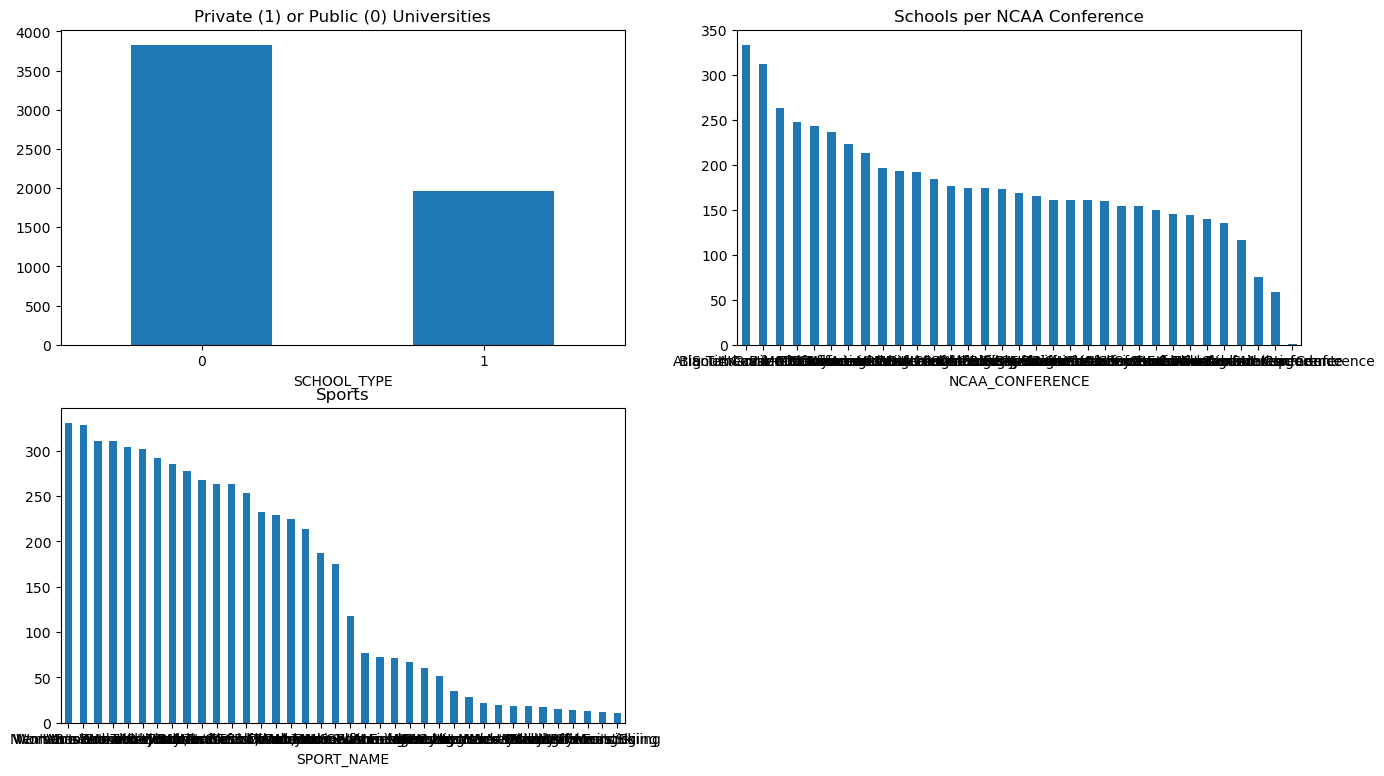

In [140]:
plt.subplot(221)

data['SCHOOL_TYPE'].value_counts().plot(kind='bar', title='Private (1) or Public (0) Universities', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(222)

data['NCAA_CONFERENCE'].value_counts().plot(kind='bar', title='Schools per NCAA Conference')

plt.xticks(rotation=0)

plt.subplot(223)

data['SPORT_NAME'].value_counts().plot(kind='bar', title='Sports')

plt.xticks(rotation=0)

plt.show()

C:\Users\15152\AppData\Local\Temp\ipykernel_13576\1685482901.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['FOURYEAR_SCORE'])


<Axes: xlabel='FOURYEAR_SCORE', ylabel='Density'>

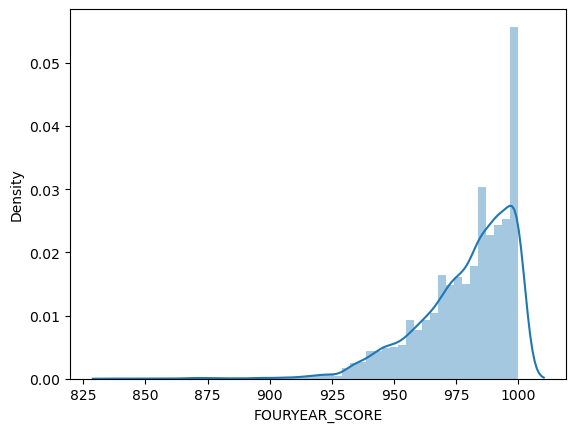

In [141]:
sns.distplot(data['FOURYEAR_SCORE'])

C:\Users\15152\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


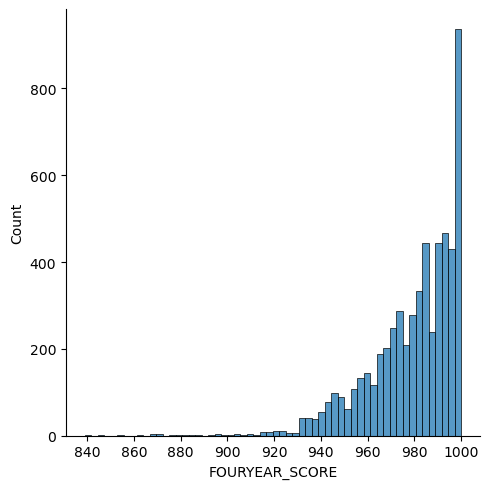

In [142]:
sns.displot(data['FOURYEAR_SCORE'])

<Axes: >

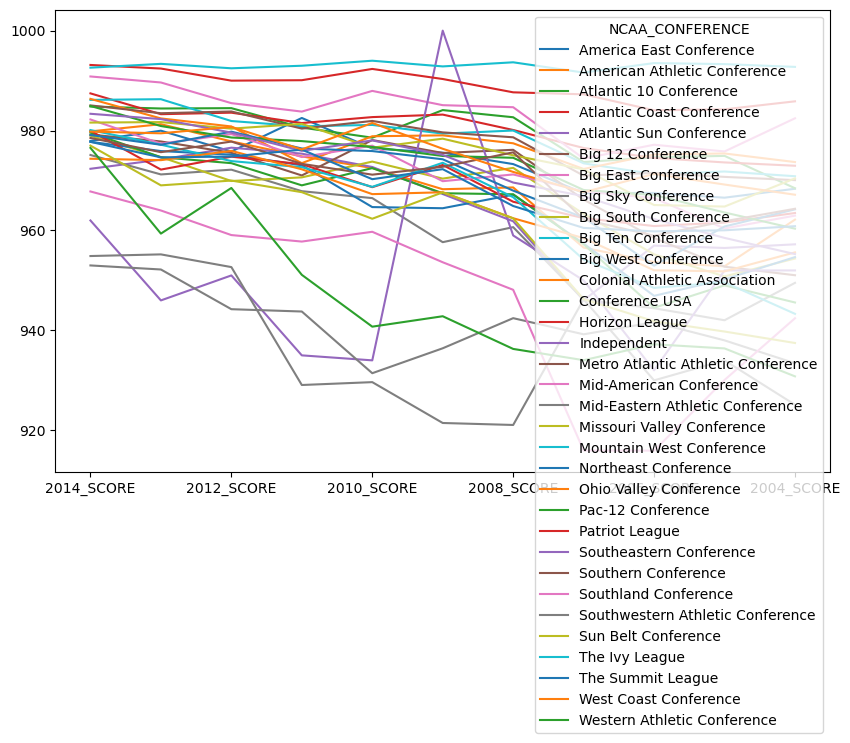

In [143]:
data.groupby('NCAA_CONFERENCE')[['2014_SCORE','2013_SCORE','2012_SCORE','2011_SCORE','2010_SCORE','2009_SCORE','2008_SCORE','2007_SCORE','2006_SCORE','2005_SCORE','2004_SCORE']].mean().T.plot(figsize=(10,6))

In [144]:
#Analysis for just one sport (Women's Softball) so that we can analyze what the best school would be for a sample athlete (softball player).
unique_sports = data['SPORT_NAME'].unique()
print(unique_sports)

['Baseball' 'Football' "Men's Basketball" "Men's Golf"
 "Men's Track, Indoor" "Men's Track, Outdoor" "Women's Basketball"
 "Women's Bowling" "Women's Cross Country" "Women's Soccer"
 "Women's Softball" "Women's Tennis" "Women's Track, Indoor"
 "Women's Track, Outdoor" "Women's Volleyball" "Men's Soccer"
 "Men's Tennis" "Women's Golf" "Men's Cross Country" "Men's Swimming"
 "Women's Gymnastics" "Women's Swimming" 'Mixed Rifle' "Men's Wrestling"
 "Women's Water Polo" "Men's Volleyball" "Men's Water Polo"
 "Women's Rowing" "Men's Gymnastics" "Women's Field Hockey"
 "Women's Lacrosse" "Men's Skiing" "Women's Skiing" "Men's Ice Hockey"
 "Men's Lacrosse" "Men's Fencing" "Women's Ice Hockey" "Women's Fencing"]


In [145]:
sb_data = data.loc[(data['SPORT_NAME'] == "Women's Softball")]
print(sb_data)

      SCHOOL_ID                          SCHOOL_NAME  SCHOOL_TYPE  \
10       100654               Alabama A&M University            0   
24       100663  University of Alabama at Birmingham            0   
42       100724             Alabama State University            0   
61       100751                University of Alabama            0   
81       100858                    Auburn University            0   
...         ...                                  ...          ...   
5641     237525                  Marshall University            0   
5689     240277    University of Wisconsin-Green Bay            0   
5710     240444     University of Wisconsin, Madison            0   
5770     243744                  Stanford University            1   
5791     243780                    Purdue University            0   

      ACADEMIC_YEAR  SPORT_CODE        SPORT_NAME  NCAA_DIVISION  \
10             2014          29  Women's Softball              1   
24             2014          29  Wo

In [146]:
sb_big12 = data.loc[(data['SPORT_NAME'] == "Women's Softball") & (data['NCAA_CONFERENCE'] == 'Big 12 Conference')]

print(sb_big12)

      SCHOOL_ID                    SCHOOL_NAME  SCHOOL_TYPE  ACADEMIC_YEAR  \
1777     153603          Iowa State University            0           2014   
1835     155317           University of Kansas            0           2014   
4078     207388      Oklahoma State University            0           2014   
4097     207500         University of Oklahoma            0           2014   
4919     223232              Baylor University            1           2014   
5141     228778  University of Texas at Austin            0           2014   
5222     229115          Texas Tech University            0           2014   

      SPORT_CODE        SPORT_NAME  NCAA_DIVISION    NCAA_CONFERENCE  \
1777          29  Women's Softball              1  Big 12 Conference   
1835          29  Women's Softball              1  Big 12 Conference   
4078          29  Women's Softball              1  Big 12 Conference   
4097          29  Women's Softball              1  Big 12 Conference   
4919          2

In [147]:
sb_data.head()

,SCHOOL_ID,SCHOOL_NAME,SCHOOL_TYPE,ACADEMIC_YEAR,SPORT_CODE,SPORT_NAME,NCAA_DIVISION,NCAA_CONFERENCE,FOURYEAR_ATHLETES,FOURYEAR_SCORE,...,2006_RETENTION,2005_ATHLETES,2005_SCORE,2005_ELIGIBILITY,2005_RETENTION,2004_ATHLETES,2004_SCORE,2004_ELIGIBILITY,2004_RETENTION,NCAACONF_ID
10,100654,Alabama A&M University,0,2014,29,Women's Softball,1,Southwestern Athletic Conference,61,921,...,1000.0,12,875,875.0,875.0,12,913,913.0,913.0,27
24,100663,University of Alabama at Birmingham,0,2014,29,Women's Softball,1,Conference USA,91,992,...,923.1,22,955,931.8,977.3,20,974,948.7,1000.0,12
42,100724,Alabama State University,0,2014,29,Women's Softball,1,Southwestern Athletic Conference,71,922,...,1000.0,9,941,1000.0,882.4,11,857,809.5,904.8,27
61,100751,University of Alabama,0,2014,29,Women's Softball,1,Southeastern Conference,77,993,...,1000.0,20,974,948.7,1000.0,17,1000,1000.0,1000.0,24
81,100858,Auburn University,0,2014,29,Women's Softball,1,Southeastern Conference,75,983,...,956.5,19,943,914.3,971.4,24,967,977.8,955.6,24


In [148]:
sb_data.tail()

,SCHOOL_ID,SCHOOL_NAME,SCHOOL_TYPE,ACADEMIC_YEAR,SPORT_CODE,SPORT_NAME,NCAA_DIVISION,NCAA_CONFERENCE,FOURYEAR_ATHLETES,FOURYEAR_SCORE,...,2006_RETENTION,2005_ATHLETES,2005_SCORE,2005_ELIGIBILITY,2005_RETENTION,2004_ATHLETES,2004_SCORE,2004_ELIGIBILITY,2004_RETENTION,NCAACONF_ID
5641,237525,Marshall University,0,2014,29,Women's Softball,1,Conference USA,89,982,...,972.2,17,985,970.6,1000.0,18,986,1000.0,972.2,12
5689,240277,University of Wisconsin-Green Bay,0,2014,29,Women's Softball,1,Horizon League,94,989,...,950.0,19,958,972.2,944.4,18,1000,1000.0,1000.0,13
5710,240444,"University of Wisconsin, Madison",0,2014,29,Women's Softball,1,Big Ten Conference,68,992,...,1000.0,15,983,966.7,1000.0,17,941,941.2,941.2,9
5770,243744,Stanford University,1,2014,29,Women's Softball,1,Pac-12 Conference,62,1000,...,1000.0,16,1000,1000.0,1000.0,16,953,968.8,937.5,22
5791,243780,Purdue University,0,2014,29,Women's Softball,1,Big Ten Conference,79,990,...,1000.0,17,1000,1000.0,1000.0,23,1000,1000.0,1000.0,9


In [149]:
sb_data.describe()

,SCHOOL_ID,SCHOOL_TYPE,ACADEMIC_YEAR,SPORT_CODE,NCAA_DIVISION,FOURYEAR_ATHLETES,FOURYEAR_SCORE,FOURYEAR_ELIGIBILITY,FOURYEAR_RETENTION,2014_ATHLETES,...,2006_RETENTION,2005_ATHLETES,2005_SCORE,2005_ELIGIBILITY,2005_RETENTION,2004_ATHLETES,2004_SCORE,2004_ELIGIBILITY,2004_RETENTION,NCAACONF_ID
count,268.000000,268.000000,268.0,268.0,268.0,268.000000,268.000000,268.000000,268.000000,268.000000,...,268.00000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,176458.309701,0.309701,2014.0,29.0,1.0,72.119403,980.992537,982.843284,974.643284,18.328358,...,955.30597,16.813433,965.697761,971.025373,958.376866,16.615672,966.067164,970.676866,960.175373,15.697761
std,39355.175354,0.463236,0.0,0.0,0.0,11.256655,17.568910,22.146345,19.870317,3.270057,...,45.21422,3.479567,31.287630,34.599380,41.926436,3.243786,39.145115,42.919074,46.343631,8.923419
min,100654.000000,0.000000,2014.0,29.0,1.0,36.000000,902.000000,866.200000,881.200000,6.000000,...,785.70000,5.000000,865.000000,828.600000,800.000000,5.000000,774.000000,741.900000,750.000000,0.000000
25%,145627.750000,0.000000,2014.0,29.0,1.0,65.000000,973.000000,977.375000,963.500000,16.000000,...,937.00000,15.000000,946.750000,952.100000,941.200000,15.000000,952.000000,961.500000,938.925000,9.000000
50%,179561.500000,0.000000,2014.0,29.0,1.0,71.000000,984.000000,988.000000,978.550000,18.000000,...,966.70000,17.000000,971.000000,975.000000,967.200000,17.000000,975.000000,981.350000,970.200000,16.000000
75%,211481.750000,1.000000,2014.0,29.0,1.0,78.000000,993.000000,1000.000000,987.950000,20.000000,...,1000.00000,19.000000,988.000000,1000.000000,1000.000000,19.000000,1000.000000,1000.000000,1000.000000,23.000000
max,243780.000000,1.000000,2014.0,29.0,1.0,115.000000,1000.000000,1000.000000,1000.000000,31.000000,...,1000.00000,25.000000,1000.000000,1000.000000,1000.000000,24.000000,1000.000000,1000.000000,1000.000000,32.000000


In [150]:
sb_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 10 to 5791
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SCHOOL_ID             268 non-null    int64  
 1   SCHOOL_NAME           268 non-null    object 
 2   SCHOOL_TYPE           268 non-null    int64  
 3   ACADEMIC_YEAR         268 non-null    int64  
 4   SPORT_CODE            268 non-null    int64  
 5   SPORT_NAME            268 non-null    object 
 6   NCAA_DIVISION         268 non-null    int64  
 7   NCAA_CONFERENCE       268 non-null    object 
 8   FOURYEAR_ATHLETES     268 non-null    int64  
 9   FOURYEAR_SCORE        268 non-null    int64  
 10  FOURYEAR_ELIGIBILITY  268 non-null    float64
 11  FOURYEAR_RETENTION    268 non-null    float64
 12  2014_ATHLETES         268 non-null    int64  
 13  2014_SCORE            268 non-null    int64  
 14  2014_ELIGIBILITY      268 non-null    float64
 15  2014_RETENTION        268 

In [151]:
#Getting the average APR per conference
conf_avg = sb_data.groupby('NCAA_CONFERENCE')['FOURYEAR_SCORE'].mean()
rd_confavg = round(conf_avg)
print (rd_confavg)

NCAA_CONFERENCE
America East Conference               980.0
American Athletic Conference          987.0
Atlantic 10 Conference                988.0
Atlantic Coast Conference             987.0
Atlantic Sun Conference               983.0
Big 12 Conference                     985.0
Big East Conference                   993.0
Big Sky Conference                    979.0
Big South Conference                  976.0
Big Ten Conference                    988.0
Big West Conference                   979.0
Colonial Athletic Association         989.0
Conference USA                        977.0
Horizon League                        983.0
Metro Atlantic Athletic Conference    984.0
Mid-American Conference               980.0
Mid-Eastern Athletic Conference       945.0
Missouri Valley Conference            990.0
Mountain West Conference              982.0
Northeast Conference                  979.0
Ohio Valley Conference                975.0
Pac-12 Conference                     988.0
Patriot League  

In [152]:
rd_confavg.describe(include='all')

count     32.000000
mean     981.375000
std       11.519269
min      943.000000
25%      979.000000
50%      983.000000
75%      987.250000
max      999.000000
Name: FOURYEAR_SCORE, dtype: float64

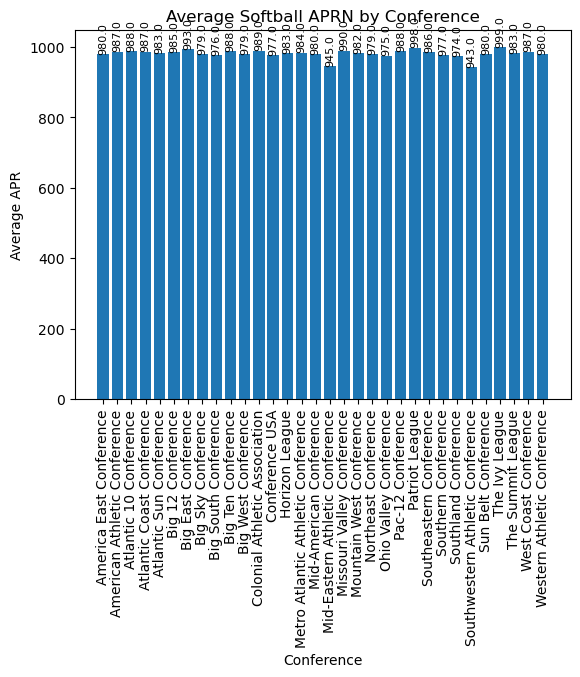

In [153]:
#Exploratory data plots
#plt.bar(average.index, average.values)
#plt.xlabel('Conference')
#plt.ylabel('Average APR')
#plt.title('Average Softball APR by Conference')
#plt.xticks(rotation=90)

#Create the bar plot
fig, ax = plt.subplots()
bars = ax.bar(rd_confavg.index, rd_confavg.values)
plt.xlabel('Conference')
plt.ylabel('Average APR')
plt.title('Average Softball APRN by Conference')
plt.xticks(rotation=90)

#Add data values on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom', rotation=90, fontsize=8)
plt.show()

In [154]:
#Creating a dataframe with the Conferences that have the top 3 average APR's
top3conf_sb = sb_data[(sb_data['NCAA_CONFERENCE'] == 'The Ivy League') | (sb_data['NCAA_CONFERENCE'] == 'Patriot League') | (sb_data['NCAA_CONFERENCE'] == 'Big East Conference')]

print(top3conf_sb)

      SCHOOL_ID                          SCHOOL_NAME  SCHOOL_TYPE  \
899      130794                      Yale University            1   
1414     144740                    DePaul University            1   
1618     150163                    Butler University            1   
2335     164988                    Boston University            1   
2367     166027                   Harvard University            1   
2390     166124            College of the Holy Cross            1   
2807     181002                 Creighton University            1   
2887     182670                    Dartmouth College            1   
2974     186131                 Princeton University            1   
3049     186584                Seton Hall University            1   
3121     190099                   Colgate University            1   
3147     190150  Columbia University-Barnard College            1   
3174     190415                   Cornell University            1   
3362     195809     St. John's Uni

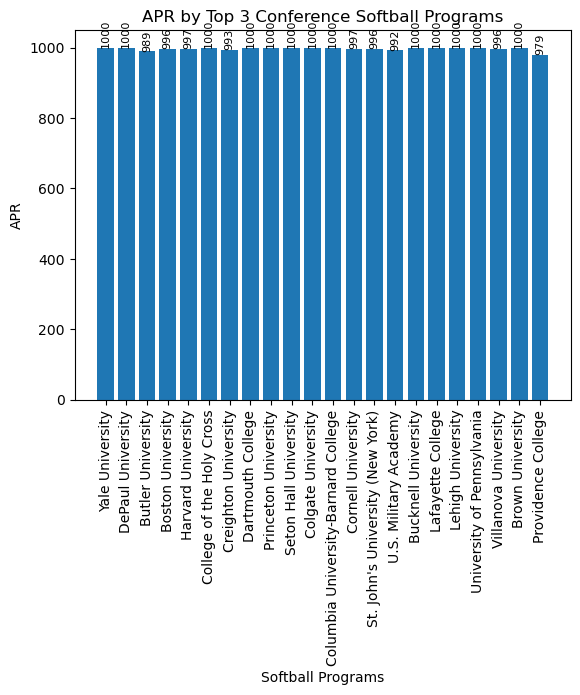

In [155]:
#Plotting the APR's of the softball programs for the top 3 conferences with the highest APR average.
#Create the bar plot
fig, ax = plt.subplots()
bars = ax.bar(top3conf_sb['SCHOOL_NAME'], top3conf_sb['FOURYEAR_SCORE']) 
plt.xlabel('Softball Programs')
plt.ylabel('APR')
plt.title('APR by Top 3 Conference Softball Programs')
plt.xticks(rotation=90)

#Add data values on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom', rotation=90, fontsize=8)
plt.show()

In [156]:
#Since we know the schools with an APR of 1000 have 100% retention and 100% eligibility, let's look into the eligibility and retention of the other schools.
#Create the dataframe first
lessthan1000 = top3conf_sb[(sb_data['FOURYEAR_SCORE'] < 1000)]
print(lessthan1000)

      SCHOOL_ID                       SCHOOL_NAME  SCHOOL_TYPE  ACADEMIC_YEAR  \
1618     150163                 Butler University            1           2014   
2335     164988                 Boston University            1           2014   
2367     166027                Harvard University            1           2014   
2807     181002              Creighton University            1           2014   
3174     190415                Cornell University            1           2014   
3362     195809  St. John's University (New York)            1           2014   
3482     197036             U.S. Military Academy            0           2014   
4461     216597              Villanova University            1           2014   
4511     217402                Providence College            1           2014   

      SPORT_CODE        SPORT_NAME  NCAA_DIVISION      NCAA_CONFERENCE  \
1618          29  Women's Softball              1  Big East Conference   
2335          29  Women's Softball       

C:\Users\15152\AppData\Local\Temp\ipykernel_13576\1765117494.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lessthan1000 = top3conf_sb[(sb_data['FOURYEAR_SCORE'] < 1000)]


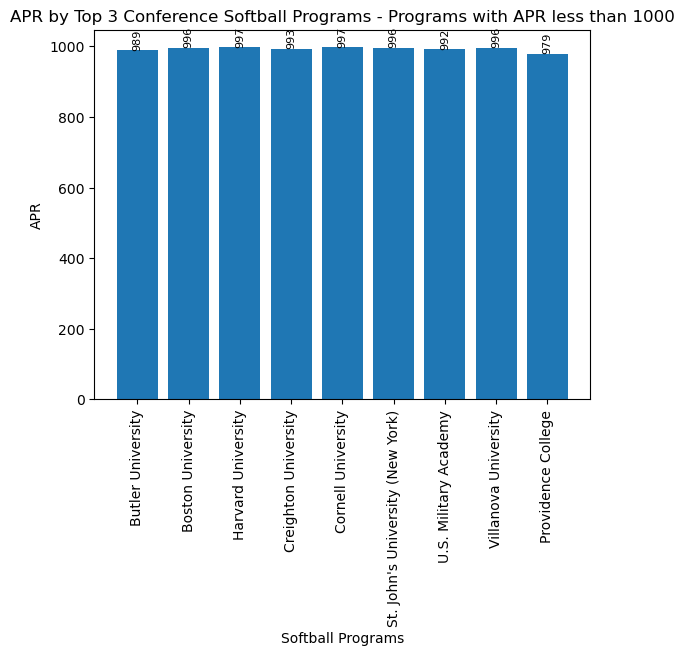

In [157]:
#Create the bar plot
fig, ax = plt.subplots()
bars = ax.bar(lessthan1000['SCHOOL_NAME'], lessthan1000['FOURYEAR_SCORE'])
plt.xlabel('Softball Programs')
plt.ylabel('APR')
plt.title('APR by Top 3 Conference Softball Programs - Programs with APR less than 1000')
plt.xticks(rotation=90)

#Add data values on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom', rotation=90, fontsize=8)
plt.show()

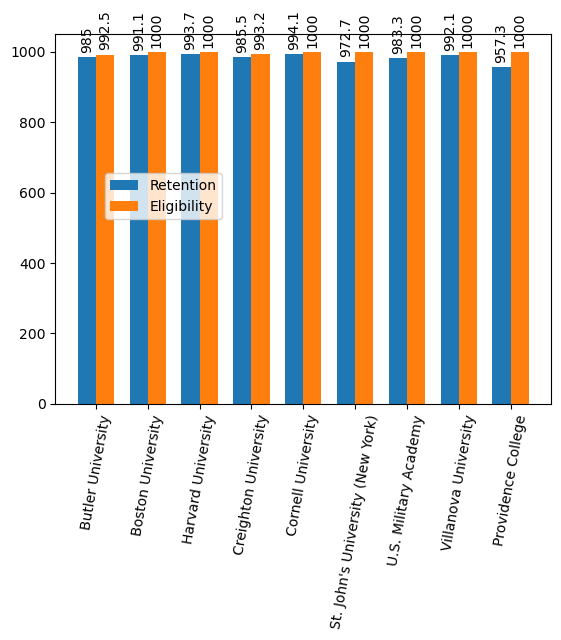

In [158]:
#Plotting programs above from the standpoint of eligibility and retention
#Pulling data
categories = lessthan1000[('SCHOOL_NAME')]
values1 = lessthan1000[('FOURYEAR_RETENTION')]
values2 = lessthan1000[('FOURYEAR_ELIGIBILITY')]

# Create the figure and axes
fig, ax = plt.subplots()

# Width of the bars
width = 0.35

# Positions of the bars
x = np.arange(len(categories))

# Create the bars
bars1 = ax.bar(x - width/2, values1, width, label='Retention')
bars2 = ax.bar(x + width/2, values2, width, label='Eligibility')

# Add labels to the bars
ax.bar_label(bars1, padding=3,rotation=90)
ax.bar_label(bars2, padding=3,rotation=90)

# Set the x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(categories,rotation=80)

# Add a legend
ax.legend(loc=(0.1,0.5))

# Show the plot
plt.show()

<Axes: >

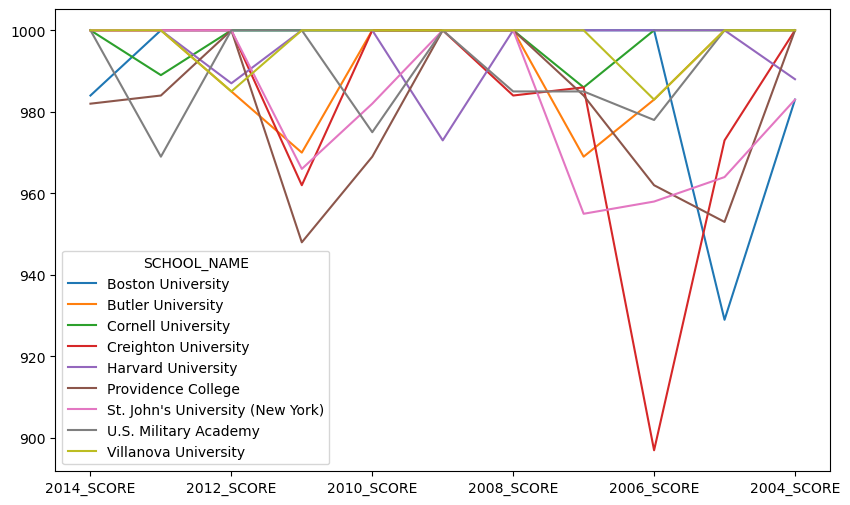

In [159]:
#From here, in order to gain insight, let's plot the same schools in a line graph of their APR over time
lessthan1000.groupby('SCHOOL_NAME')[['2014_SCORE','2013_SCORE','2012_SCORE','2011_SCORE','2010_SCORE','2009_SCORE','2008_SCORE','2007_SCORE','2006_SCORE','2005_SCORE','2004_SCORE']].mean().T.plot(figsize=(10,6))



C:\Users\15152\AppData\Local\Temp\ipykernel_13576\3988355740.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  creightonsb = lessthan1000[(sb_data['SCHOOL_NAME'] == 'Creighton University')]


<Axes: >

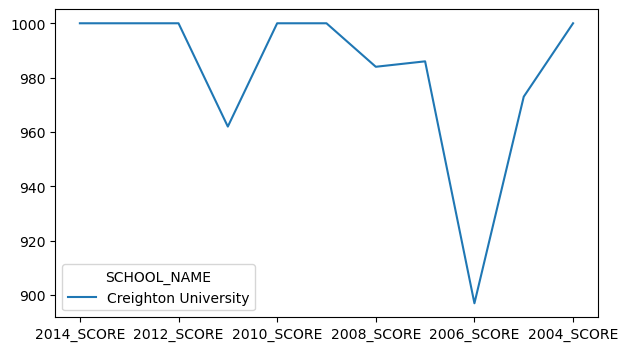

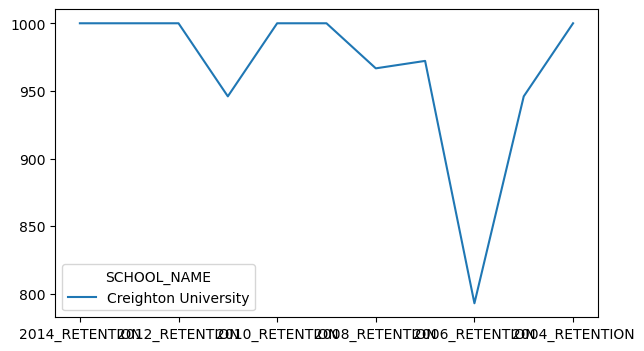

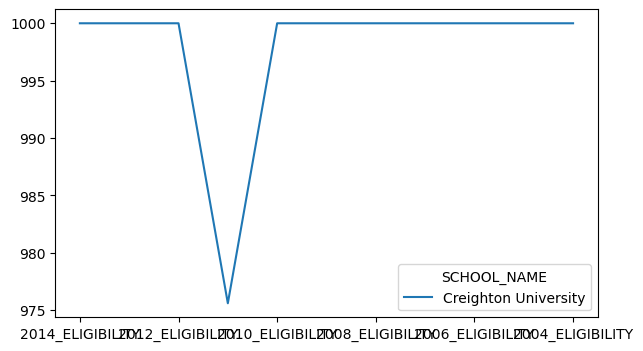

In [160]:
#Picking schools with a lot of variation over the years, let's see how the retention and eligibility has varied. We will look specifically at Creighton.
creightonsb = lessthan1000[(sb_data['SCHOOL_NAME'] == 'Creighton University')]

creightonsb.groupby(['SCHOOL_NAME'])[['2014_SCORE','2013_SCORE','2012_SCORE','2011_SCORE','2010_SCORE','2009_SCORE','2008_SCORE','2007_SCORE','2006_SCORE','2005_SCORE','2004_SCORE']].mean().T.plot(figsize=(7,4))
creightonsb.groupby(['SCHOOL_NAME'])[['2014_RETENTION','2013_RETENTION','2012_RETENTION','2011_RETENTION','2010_RETENTION','2009_RETENTION','2008_RETENTION','2007_RETENTION','2006_RETENTION','2005_RETENTION','2004_RETENTION']].mean().T.plot(figsize=(7,4))
creightonsb.groupby(['SCHOOL_NAME'])[['2014_ELIGIBILITY','2013_ELIGIBILITY','2012_ELIGIBILITY','2011_ELIGIBILITY','2010_ELIGIBILITY','2009_ELIGIBILITY','2008_ELIGIBILITY','2007_ELIGIBILITY','2006_ELIGIBILITY','2005_ELIGIBILITY','2004_ELIGIBILITY']].mean().T.plot(figsize=(7,4))

# Case Study - Softball Athlete Looking for Athletic Program in Schools of Choice

In [161]:
#Case Study of a student who wants to analyze their top schools. 
#1: Create the dataframe that we want to analyze (many schools)
#2: Compare the FOURYEAR APR between schools
#3: Depending on results, dive deeper into Eligibility and Retention and trend throughout the years.
#4: Predict using machine learning, where eligibility and retention would be in the coming years. 
#5: Based on what school is in good shape, can predict the best academic program to play softball.

In [162]:
sb_data[sb_data['SCHOOL_NAME'].str.contains('Missouri')]

,SCHOOL_ID,SCHOOL_NAME,SCHOOL_TYPE,ACADEMIC_YEAR,SPORT_CODE,SPORT_NAME,NCAA_DIVISION,NCAA_CONFERENCE,FOURYEAR_ATHLETES,FOURYEAR_SCORE,...,2006_RETENTION,2005_ATHLETES,2005_SCORE,2005_ELIGIBILITY,2005_RETENTION,2004_ATHLETES,2004_SCORE,2004_ELIGIBILITY,2004_RETENTION,NCAACONF_ID
2699,178396,"University of Missouri, Columbia",0,2014,29,Women's Softball,1,Southeastern Conference,91,994,...,930.2,19,974,1000.0,947.4,22,955,954.6,954.6,24
2715,178402,University of Missouri-Kansas City,0,2014,29,Women's Softball,1,Western Athletic Conference,80,967,...,875.0,16,967,1000.0,933.3,19,829,885.7,771.4,32
2746,179557,Southeast Missouri State University,0,2014,29,Women's Softball,1,Ohio Valley Conference,87,960,...,941.2,23,955,954.6,954.6,23,944,955.6,933.3,21
2762,179566,Missouri State University,0,2014,29,Women's Softball,1,Missouri Valley Conference,78,990,...,935.5,19,946,1000.0,891.9,18,971,1000.0,942.9,18


In [163]:
#Create the dataframe to be analyzed that includes various schools. 
#Case study is a softball player that wants to study veterinary services. 
#Iowa State University, Texas A&M, UNI, University of Nebraska Lincoln, Kansas State University (Kansas State University not included in data), 
#University of Missouri, & Oklahoma State University

casestudy_sb = sb_data[(sb_data['SCHOOL_NAME'] == 'Iowa State University') | (sb_data['SCHOOL_NAME'] == 'University of Nebraska, Lincoln') | (sb_data['SCHOOL_NAME'] == 'University of Northern Iowa') |
                     (sb_data['SCHOOL_NAME'] == 'University of Missouri, Columbia') | (sb_data['SCHOOL_NAME'] == 'Oklahoma State University') | (sb_data['SCHOOL_NAME'] == 'Kansas State University') | (sb_data['SCHOOL_NAME'] == 'Texas A&M University, College Station') ]

print(casestudy_sb)

      SCHOOL_ID                            SCHOOL_NAME  SCHOOL_TYPE  \
1777     153603                  Iowa State University            0   
1817     154095            University of Northern Iowa            0   
2699     178396       University of Missouri, Columbia            0   
2826     181464        University of Nebraska, Lincoln            0   
4078     207388              Oklahoma State University            0   
5107     228723  Texas A&M University, College Station            0   

      ACADEMIC_YEAR  SPORT_CODE        SPORT_NAME  NCAA_DIVISION  \
1777           2014          29  Women's Softball              1   
1817           2014          29  Women's Softball              1   
2699           2014          29  Women's Softball              1   
2826           2014          29  Women's Softball              1   
4078           2014          29  Women's Softball              1   
5107           2014          29  Women's Softball              1   

                 NCAA_CON

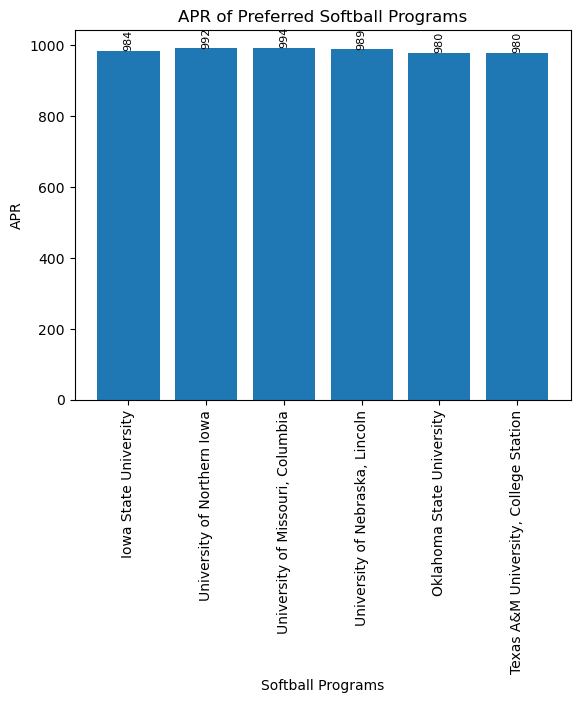

In [164]:
#2: Compare the FOURYEAR APR between schools
#Create the bar plot
fig, ax = plt.subplots()
bars = ax.bar(casestudy_sb['SCHOOL_NAME'], casestudy_sb['FOURYEAR_SCORE'])
plt.xlabel('Softball Programs')
plt.ylabel('APR')
plt.title('APR of Preferred Softball Programs')
plt.xticks(rotation=90)

#Add data values on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom', rotation=90, fontsize=8)
plt.show()

<Axes: >

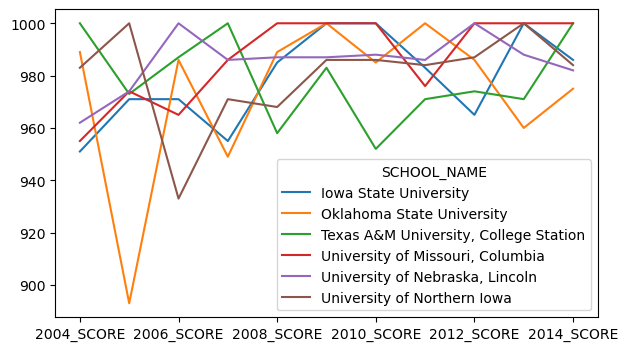

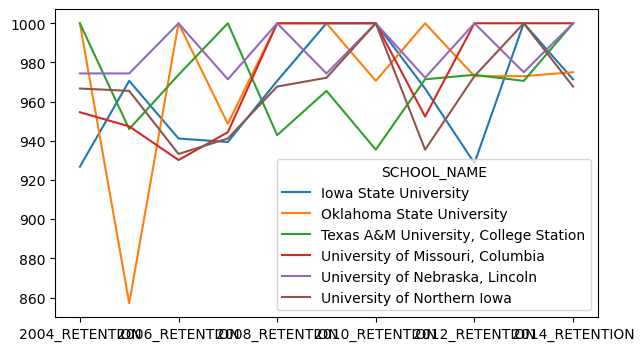

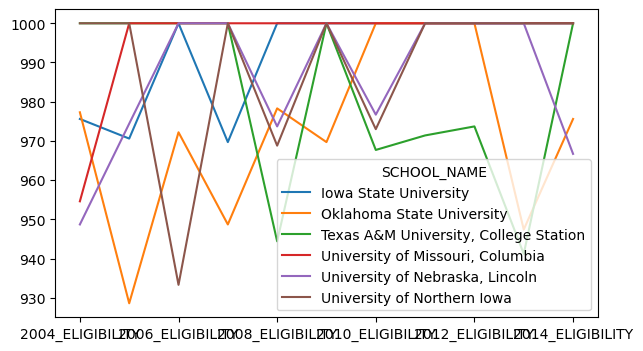

In [165]:
#Case Study Step #3: Dive deeper into Eligibility and Retention and trend throughout the years.

casestudy_sb.groupby(['SCHOOL_NAME'])[['2004_SCORE','2005_SCORE','2006_SCORE','2007_SCORE','2008_SCORE','2009_SCORE','2010_SCORE','2011_SCORE','2012_SCORE','2013_SCORE','2014_SCORE']].mean().T.plot(figsize=(7,4))
casestudy_sb.groupby(['SCHOOL_NAME'])[['2004_RETENTION','2005_RETENTION','2006_RETENTION','2007_RETENTION','2008_RETENTION','2009_RETENTION','2010_RETENTION','2011_RETENTION','2012_RETENTION','2013_RETENTION','2014_RETENTION']].mean().T.plot(figsize=(7,4))
casestudy_sb.groupby(['SCHOOL_NAME'])[['2004_ELIGIBILITY','2005_ELIGIBILITY','2006_ELIGIBILITY','2007_ELIGIBILITY','2008_ELIGIBILITY','2009_ELIGIBILITY','2010_ELIGIBILITY','2011_ELIGIBILITY','2012_ELIGIBILITY','2013_ELIGIBILITY','2014_ELIGIBILITY']].mean().T.plot(figsize=(7,4))

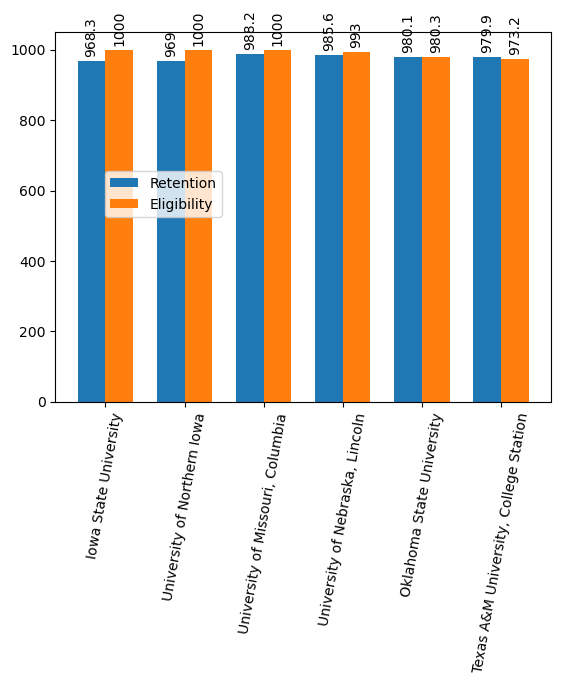

In [166]:
#Pulling data
categories = casestudy_sb[('SCHOOL_NAME')]
values1 = casestudy_sb[('FOURYEAR_RETENTION')]
values2 = casestudy_sb[('FOURYEAR_ELIGIBILITY')]

# Create the figure and axes
fig, ax = plt.subplots()

# Width of the bars
width = 0.35

# Positions of the bars
x = np.arange(len(categories))

# Create the bars
bars1 = ax.bar(x - width/2, values1, width, label='Retention')
bars2 = ax.bar(x + width/2, values2, width, label='Eligibility')

# Add labels to the bars
ax.bar_label(bars1, padding=3,rotation=90)
ax.bar_label(bars2, padding=3,rotation=90)

# Set the x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(categories,rotation=80)

# Add a legend
ax.legend(loc=(0.1,0.5))

# Show the plot
plt.show()

C:\Users\15152\AppData\Local\Temp\ipykernel_13576\4142944624.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  isu_sb = casestudy_sb[(sb_data['SCHOOL_NAME'] == 'Iowa State University')]


<Axes: >

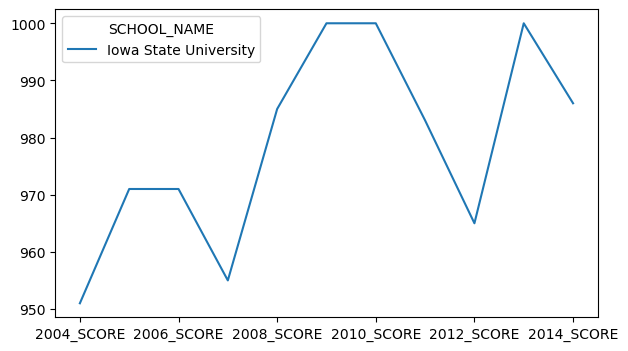

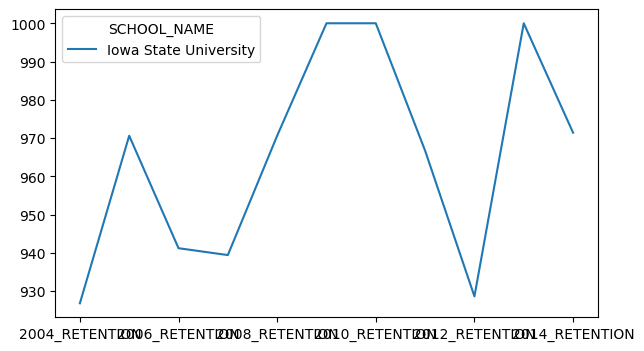

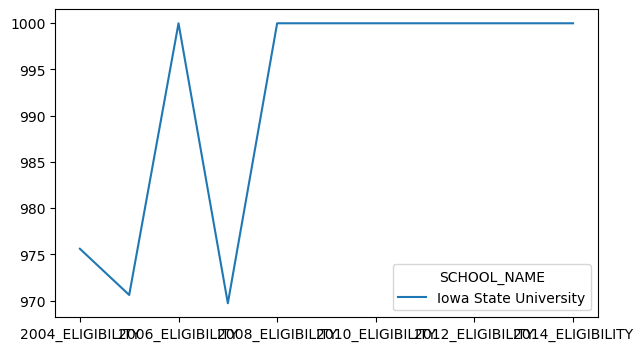

In [167]:
#Iowa State University time plot of APR, Retention & Eligibility
#Case Study Step #3: Dive deeper into Eligibility and Retention and trend throughout the years.
isu_sb = casestudy_sb[(sb_data['SCHOOL_NAME'] == 'Iowa State University')]
isu_sb.groupby(['SCHOOL_NAME'])[['2004_SCORE','2005_SCORE','2006_SCORE','2007_SCORE','2008_SCORE','2009_SCORE','2010_SCORE','2011_SCORE','2012_SCORE','2013_SCORE','2014_SCORE']].mean().T.plot(figsize=(7,4))
isu_sb.groupby(['SCHOOL_NAME'])[['2004_RETENTION','2005_RETENTION','2006_RETENTION','2007_RETENTION','2008_RETENTION','2009_RETENTION','2010_RETENTION','2011_RETENTION','2012_RETENTION','2013_RETENTION','2014_RETENTION']].mean().T.plot(figsize=(7,4))
isu_sb.groupby(['SCHOOL_NAME'])[['2004_ELIGIBILITY','2005_ELIGIBILITY','2006_ELIGIBILITY','2007_ELIGIBILITY','2008_ELIGIBILITY','2009_ELIGIBILITY','2010_ELIGIBILITY','2011_ELIGIBILITY','2012_ELIGIBILITY','2013_ELIGIBILITY','2014_ELIGIBILITY']].mean().T.plot(figsize=(7,4))

C:\Users\15152\AppData\Local\Temp\ipykernel_13576\1002262292.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  uni_sb = casestudy_sb[(sb_data['SCHOOL_NAME'] == 'University of Northern Iowa')]


<Axes: >

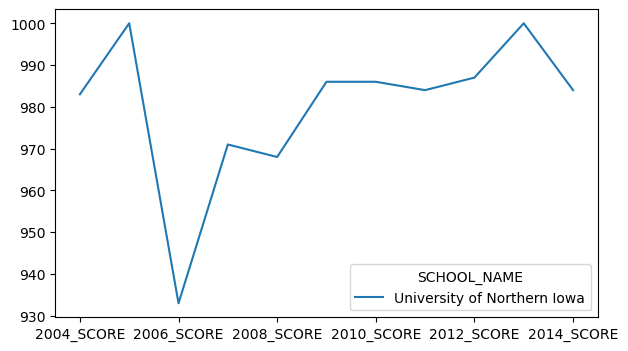

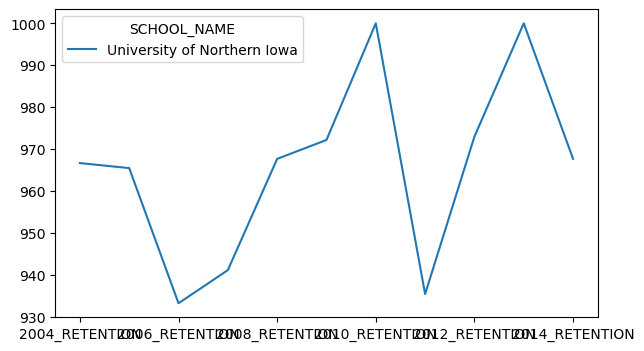

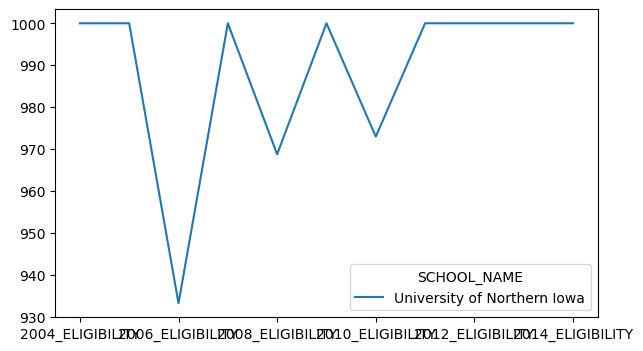

In [168]:
#University of Northern Iowa time plot of APR, Retention & Eligibility
#Case Study Step #3: Dive deeper into Eligibility and Retention and trend throughout the years.
uni_sb = casestudy_sb[(sb_data['SCHOOL_NAME'] == 'University of Northern Iowa')]
uni_sb.groupby(['SCHOOL_NAME'])[['2004_SCORE','2005_SCORE','2006_SCORE','2007_SCORE','2008_SCORE','2009_SCORE','2010_SCORE','2011_SCORE','2012_SCORE','2013_SCORE','2014_SCORE']].mean().T.plot(figsize=(7,4))
uni_sb.groupby(['SCHOOL_NAME'])[['2004_RETENTION','2005_RETENTION','2006_RETENTION','2007_RETENTION','2008_RETENTION','2009_RETENTION','2010_RETENTION','2011_RETENTION','2012_RETENTION','2013_RETENTION','2014_RETENTION']].mean().T.plot(figsize=(7,4))
uni_sb.groupby(['SCHOOL_NAME'])[['2004_ELIGIBILITY','2005_ELIGIBILITY','2006_ELIGIBILITY','2007_ELIGIBILITY','2008_ELIGIBILITY','2009_ELIGIBILITY','2010_ELIGIBILITY','2011_ELIGIBILITY','2012_ELIGIBILITY','2013_ELIGIBILITY','2014_ELIGIBILITY']].mean().T.plot(figsize=(7,4))

C:\Users\15152\AppData\Local\Temp\ipykernel_13576\1204093947.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mu_sb = casestudy_sb[(sb_data['SCHOOL_NAME'] == 'University of Missouri, Columbia')]


<Axes: >

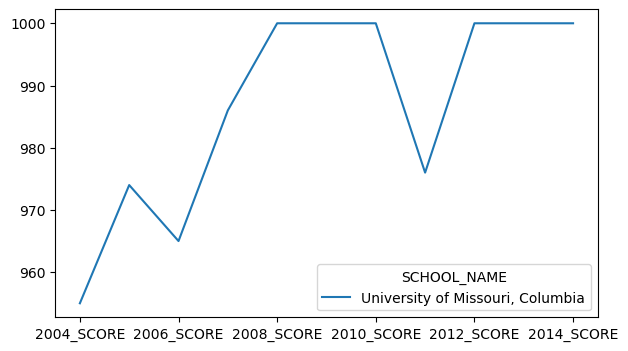

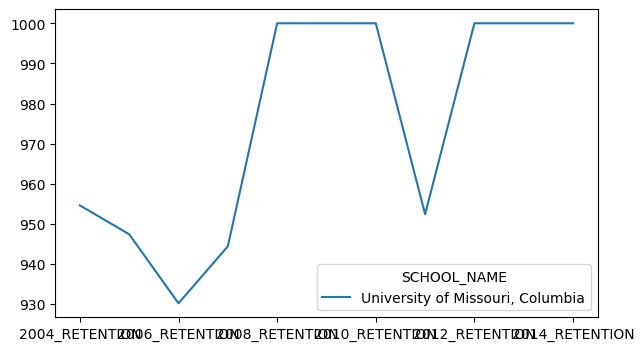

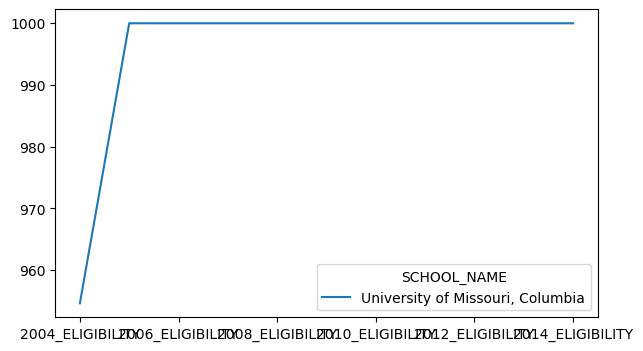

In [169]:
#University of Missouri, Columbia time plot of APR, Retention & Eligibility
#Case Study Step #3: Dive deeper into Eligibility and Retention and trend throughout the years.
mu_sb = casestudy_sb[(sb_data['SCHOOL_NAME'] == 'University of Missouri, Columbia')]
mu_sb.groupby(['SCHOOL_NAME'])[['2004_SCORE','2005_SCORE','2006_SCORE','2007_SCORE','2008_SCORE','2009_SCORE','2010_SCORE','2011_SCORE','2012_SCORE','2013_SCORE','2014_SCORE']].mean().T.plot(figsize=(7,4))
mu_sb.groupby(['SCHOOL_NAME'])[['2004_RETENTION','2005_RETENTION','2006_RETENTION','2007_RETENTION','2008_RETENTION','2009_RETENTION','2010_RETENTION','2011_RETENTION','2012_RETENTION','2013_RETENTION','2014_RETENTION']].mean().T.plot(figsize=(7,4))
mu_sb.groupby(['SCHOOL_NAME'])[['2004_ELIGIBILITY','2005_ELIGIBILITY','2006_ELIGIBILITY','2007_ELIGIBILITY','2008_ELIGIBILITY','2009_ELIGIBILITY','2010_ELIGIBILITY','2011_ELIGIBILITY','2012_ELIGIBILITY','2013_ELIGIBILITY','2014_ELIGIBILITY']].mean().T.plot(figsize=(7,4))

C:\Users\15152\AppData\Local\Temp\ipykernel_13576\851742282.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  neb_sb = casestudy_sb[(sb_data['SCHOOL_NAME'] == 'University of Nebraska, Lincoln')]


<Axes: >

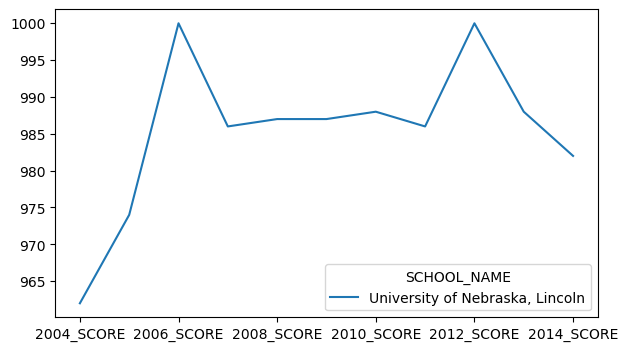

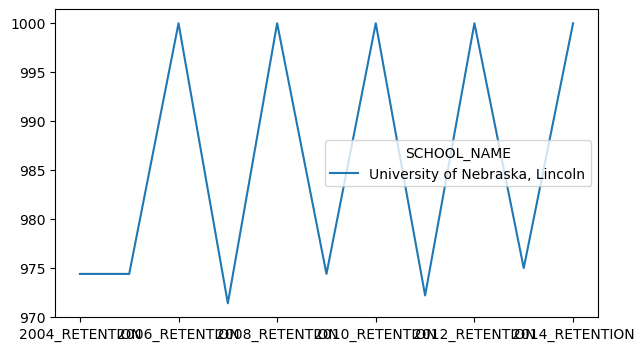

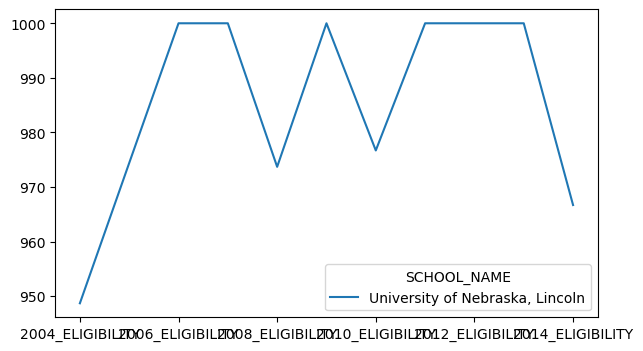

In [170]:
#University of Nebraska, Lincoln time plot of APR, Retention & Eligibility
#Case Study Step #3: Dive deeper into Eligibility and Retention and trend throughout the years.
neb_sb = casestudy_sb[(sb_data['SCHOOL_NAME'] == 'University of Nebraska, Lincoln')]
neb_sb.groupby(['SCHOOL_NAME'])[['2004_SCORE','2005_SCORE','2006_SCORE','2007_SCORE','2008_SCORE','2009_SCORE','2010_SCORE','2011_SCORE','2012_SCORE','2013_SCORE','2014_SCORE']].mean().T.plot(figsize=(7,4))
neb_sb.groupby(['SCHOOL_NAME'])[['2004_RETENTION','2005_RETENTION','2006_RETENTION','2007_RETENTION','2008_RETENTION','2009_RETENTION','2010_RETENTION','2011_RETENTION','2012_RETENTION','2013_RETENTION','2014_RETENTION']].mean().T.plot(figsize=(7,4))
neb_sb.groupby(['SCHOOL_NAME'])[['2004_ELIGIBILITY','2005_ELIGIBILITY','2006_ELIGIBILITY','2007_ELIGIBILITY','2008_ELIGIBILITY','2009_ELIGIBILITY','2010_ELIGIBILITY','2011_ELIGIBILITY','2012_ELIGIBILITY','2013_ELIGIBILITY','2014_ELIGIBILITY']].mean().T.plot(figsize=(7,4))

C:\Users\15152\AppData\Local\Temp\ipykernel_13576\3418729322.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  osu_sb = casestudy_sb[(sb_data['SCHOOL_NAME'] == 'Oklahoma State University')]


<Axes: >

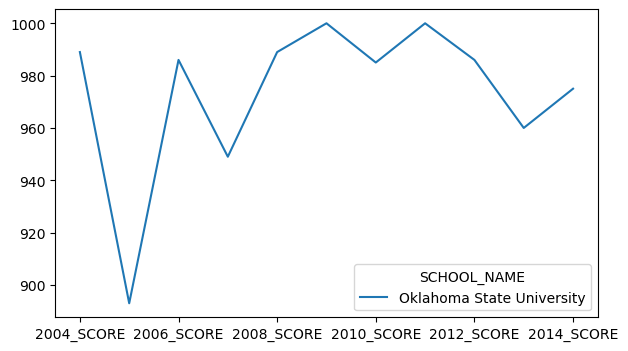

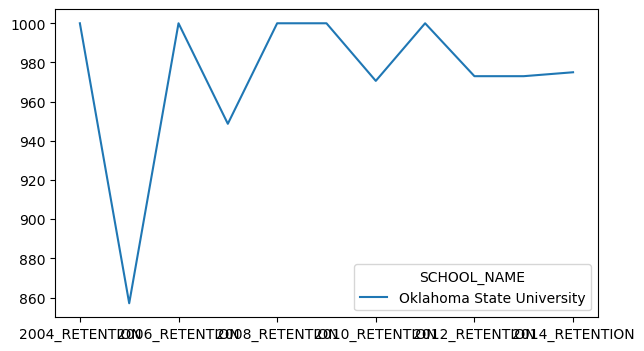

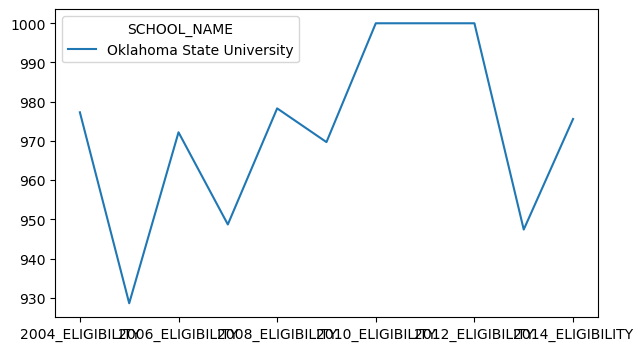

In [171]:
#Oklahoma State University time plot of APR, Retention & Eligibility
#Case Study Step #3: Dive deeper into Eligibility and Retention and trend throughout the years.
osu_sb = casestudy_sb[(sb_data['SCHOOL_NAME'] == 'Oklahoma State University')]
osu_sb.groupby(['SCHOOL_NAME'])[['2004_SCORE','2005_SCORE','2006_SCORE','2007_SCORE','2008_SCORE','2009_SCORE','2010_SCORE','2011_SCORE','2012_SCORE','2013_SCORE','2014_SCORE']].mean().T.plot(figsize=(7,4))
osu_sb.groupby(['SCHOOL_NAME'])[['2004_RETENTION','2005_RETENTION','2006_RETENTION','2007_RETENTION','2008_RETENTION','2009_RETENTION','2010_RETENTION','2011_RETENTION','2012_RETENTION','2013_RETENTION','2014_RETENTION']].mean().T.plot(figsize=(7,4))
osu_sb.groupby(['SCHOOL_NAME'])[['2004_ELIGIBILITY','2005_ELIGIBILITY','2006_ELIGIBILITY','2007_ELIGIBILITY','2008_ELIGIBILITY','2009_ELIGIBILITY','2010_ELIGIBILITY','2011_ELIGIBILITY','2012_ELIGIBILITY','2013_ELIGIBILITY','2014_ELIGIBILITY']].mean().T.plot(figsize=(7,4))

C:\Users\15152\AppData\Local\Temp\ipykernel_13576\265799022.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tam_sb = casestudy_sb[(sb_data['SCHOOL_NAME'] == 'Texas A&M University, College Station')]


<Axes: >

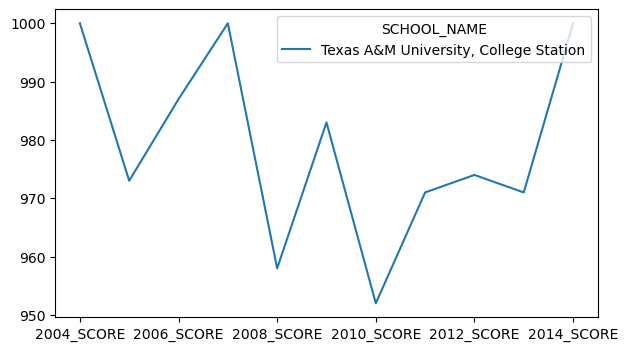

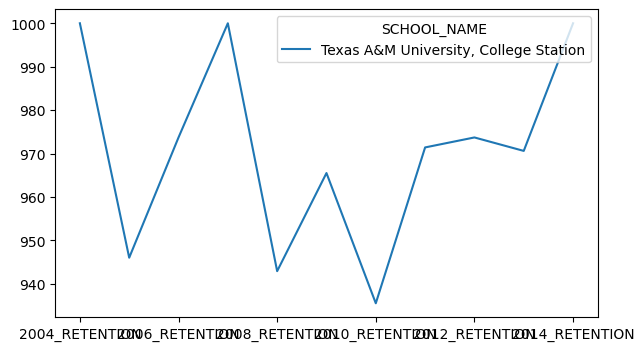

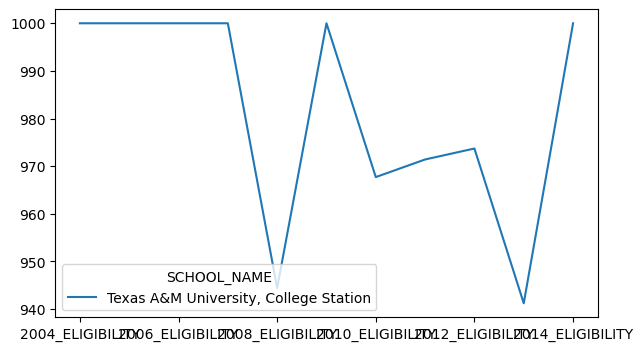

In [172]:
#Texas A&M University, College Station time plot of APR, Retention & Eligibility
#Case Study Step #3: Dive deeper into Eligibility and Retention and trend throughout the years.
tam_sb = casestudy_sb[(sb_data['SCHOOL_NAME'] == 'Texas A&M University, College Station')]
tam_sb.groupby(['SCHOOL_NAME'])[['2004_SCORE','2005_SCORE','2006_SCORE','2007_SCORE','2008_SCORE','2009_SCORE','2010_SCORE','2011_SCORE','2012_SCORE','2013_SCORE','2014_SCORE']].mean().T.plot(figsize=(7,4))
tam_sb.groupby(['SCHOOL_NAME'])[['2004_RETENTION','2005_RETENTION','2006_RETENTION','2007_RETENTION','2008_RETENTION','2009_RETENTION','2010_RETENTION','2011_RETENTION','2012_RETENTION','2013_RETENTION','2014_RETENTION']].mean().T.plot(figsize=(7,4))
tam_sb.groupby(['SCHOOL_NAME'])[['2004_ELIGIBILITY','2005_ELIGIBILITY','2006_ELIGIBILITY','2007_ELIGIBILITY','2008_ELIGIBILITY','2009_ELIGIBILITY','2010_ELIGIBILITY','2011_ELIGIBILITY','2012_ELIGIBILITY','2013_ELIGIBILITY','2014_ELIGIBILITY']].mean().T.plot(figsize=(7,4))